# Tutorial for working with SED top hat filters

In [1]:
import numpy as np
import fnmatch
from galacticus.plotting.utils import *
%matplotlib inline

# Load GalacticusHDF5 class for reading/writing of Galacticus HDF5 files.
from galacticus.io import GalacticusHDF5
# Load StellarLuminosities class for computing/extracting stellar luminosity datasets from HDF5 file
from galacticus.StellarLuminosities import StellarLuminosities
# Load Galacticus filters class
from galacticus.Filters import GalacticusFilters

In [2]:
# Load Galacticus HDF5 file
ifile = "/Users/amerson/Data/Galacticus_Out/v0.9.4/wfirstSED_singleTree_lightcone/galacticus.hdf5"
GH5 = GalacticusHDF5(ifile,'r')

In [3]:
# Print available redshifts
for i in range(len(GH5.outputs.z)):
    print(str(GH5.outputs.iout[i])+" "+GH5.outputs.name[i]+" z = "+str(GH5.outputs.z[i]))

1 Output1 z = 2.0
2 Output2 z = 1.8
3 Output3 z = 1.6
4 Output4 z = 1.4
5 Output5 z = 1.2
6 Output6 z = 1.0


In [4]:
# Pass Galacticus HDF5 class to Stellar Luminosities class
STELLAR = StellarLuminosities(GH5)

In [5]:
# List all stellar luminosities available at z = 1.4 for SED top hat filters. Print top 10.
z = 1.4
availableLuminosities = STELLAR.availableLuminosities(z)
topHats = fnmatch.filter(availableLuminosities,"*:sedTopHat*")
print(topHats[:10])

['diskLuminositiesStellar:sedTopHat_10000.000_200.00:observed:z1.4000', 'diskLuminositiesStellar:sedTopHat_10000.000_200.00:observed:z1.4000:recent', 'diskLuminositiesStellar:sedTopHat_10000.000_200.00:rest:z1.4000', 'diskLuminositiesStellar:sedTopHat_10000.000_200.00:rest:z1.4000:recent', 'diskLuminositiesStellar:sedTopHat_10200.000_200.00:observed:z1.4000', 'diskLuminositiesStellar:sedTopHat_10200.000_200.00:observed:z1.4000:recent', 'diskLuminositiesStellar:sedTopHat_10200.000_200.00:rest:z1.4000', 'diskLuminositiesStellar:sedTopHat_10200.000_200.00:rest:z1.4000:recent', 'diskLuminositiesStellar:sedTopHat_10400.000_200.00:observed:z1.4000', 'diskLuminositiesStellar:sedTopHat_10400.000_200.00:observed:z1.4000:recent']


In [6]:
# Extract list of unique SED filter names and print first 10.
filterNames = np.unique([name.split(":")[1] for name in topHats])
print(filterNames[:10])

['sedTopHat_10000.000_200.00' 'sedTopHat_10200.000_200.00'
 'sedTopHat_10400.000_200.00' 'sedTopHat_10600.000_200.00'
 'sedTopHat_10800.000_200.00' 'sedTopHat_11000.000_200.00'
 'sedTopHat_11200.000_200.00' 'sedTopHat_11400.000_200.00'
 'sedTopHat_11600.000_200.00' 'sedTopHat_11800.000_200.00']


In [7]:
# Sort by central wavelength and print first 10.
centralWavelength = np.array([float(name.split("_")[1]) for name in filterNames])
isort = np.argsort(centralWavelength)
filterNames = filterNames[isort]
print(filterNames[:10])

['sedTopHat_4166.667_83.33' 'sedTopHat_4250.000_83.33'
 'sedTopHat_4333.333_83.33' 'sedTopHat_4416.667_83.33'
 'sedTopHat_4500.000_83.33' 'sedTopHat_4583.333_83.33'
 'sedTopHat_4666.667_83.33' 'sedTopHat_4750.000_83.33'
 'sedTopHat_4833.333_83.33' 'sedTopHat_4916.667_83.33']


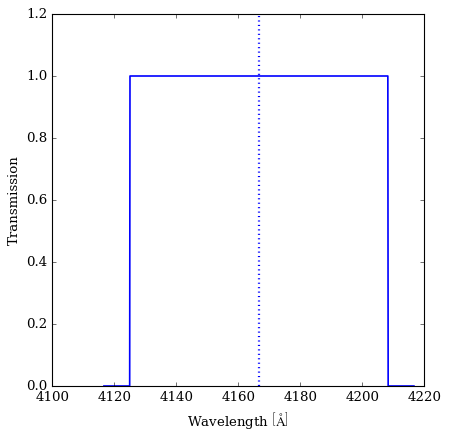

In [10]:
# We can extract a top hat filter class for each filter.
FILTERS = GalacticusFilters()
TOPHAT = FILTERS.load(filterNames[0])
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(TOPHAT.transmission.wavelength,TOPHAT.transmission.transmission,c='b',lw=1.5)
ax.axvline(TOPHAT.effectiveWavelength,ls=':',lw=2.0,c='b')
ax.set_ylim(top=1.2)
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("Transmission")
show()

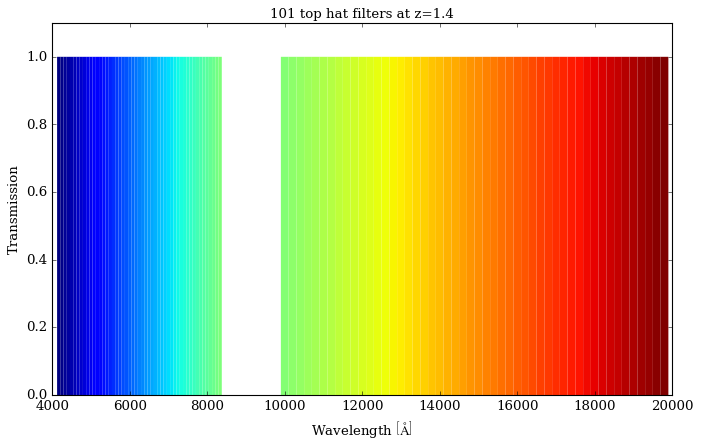

In [20]:
# Example: plot all of the top hat SED filters
fig = figure(figsize=(10,6))
ax = fig.add_subplot(111)
carr = colour_array(len(filterNames),cmap='jet')
for i,filterName in enumerate(filterNames):
    F = FILTERS.load(filterName)
    ax.fill_between(F.transmission.wavelength,0.0,F.transmission.transmission,facecolor=carr[i],edgecolor='none')
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("Transmission")
ax.set_ylim(top=1.1)
ax.set_title(str(len(filterNames))+" top hat filters at z="+str(z))
show()

In [18]:
GH5.close()